In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"D:\data analyst\datasets\AMZN.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6511,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
6512,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
6513,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
6514,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

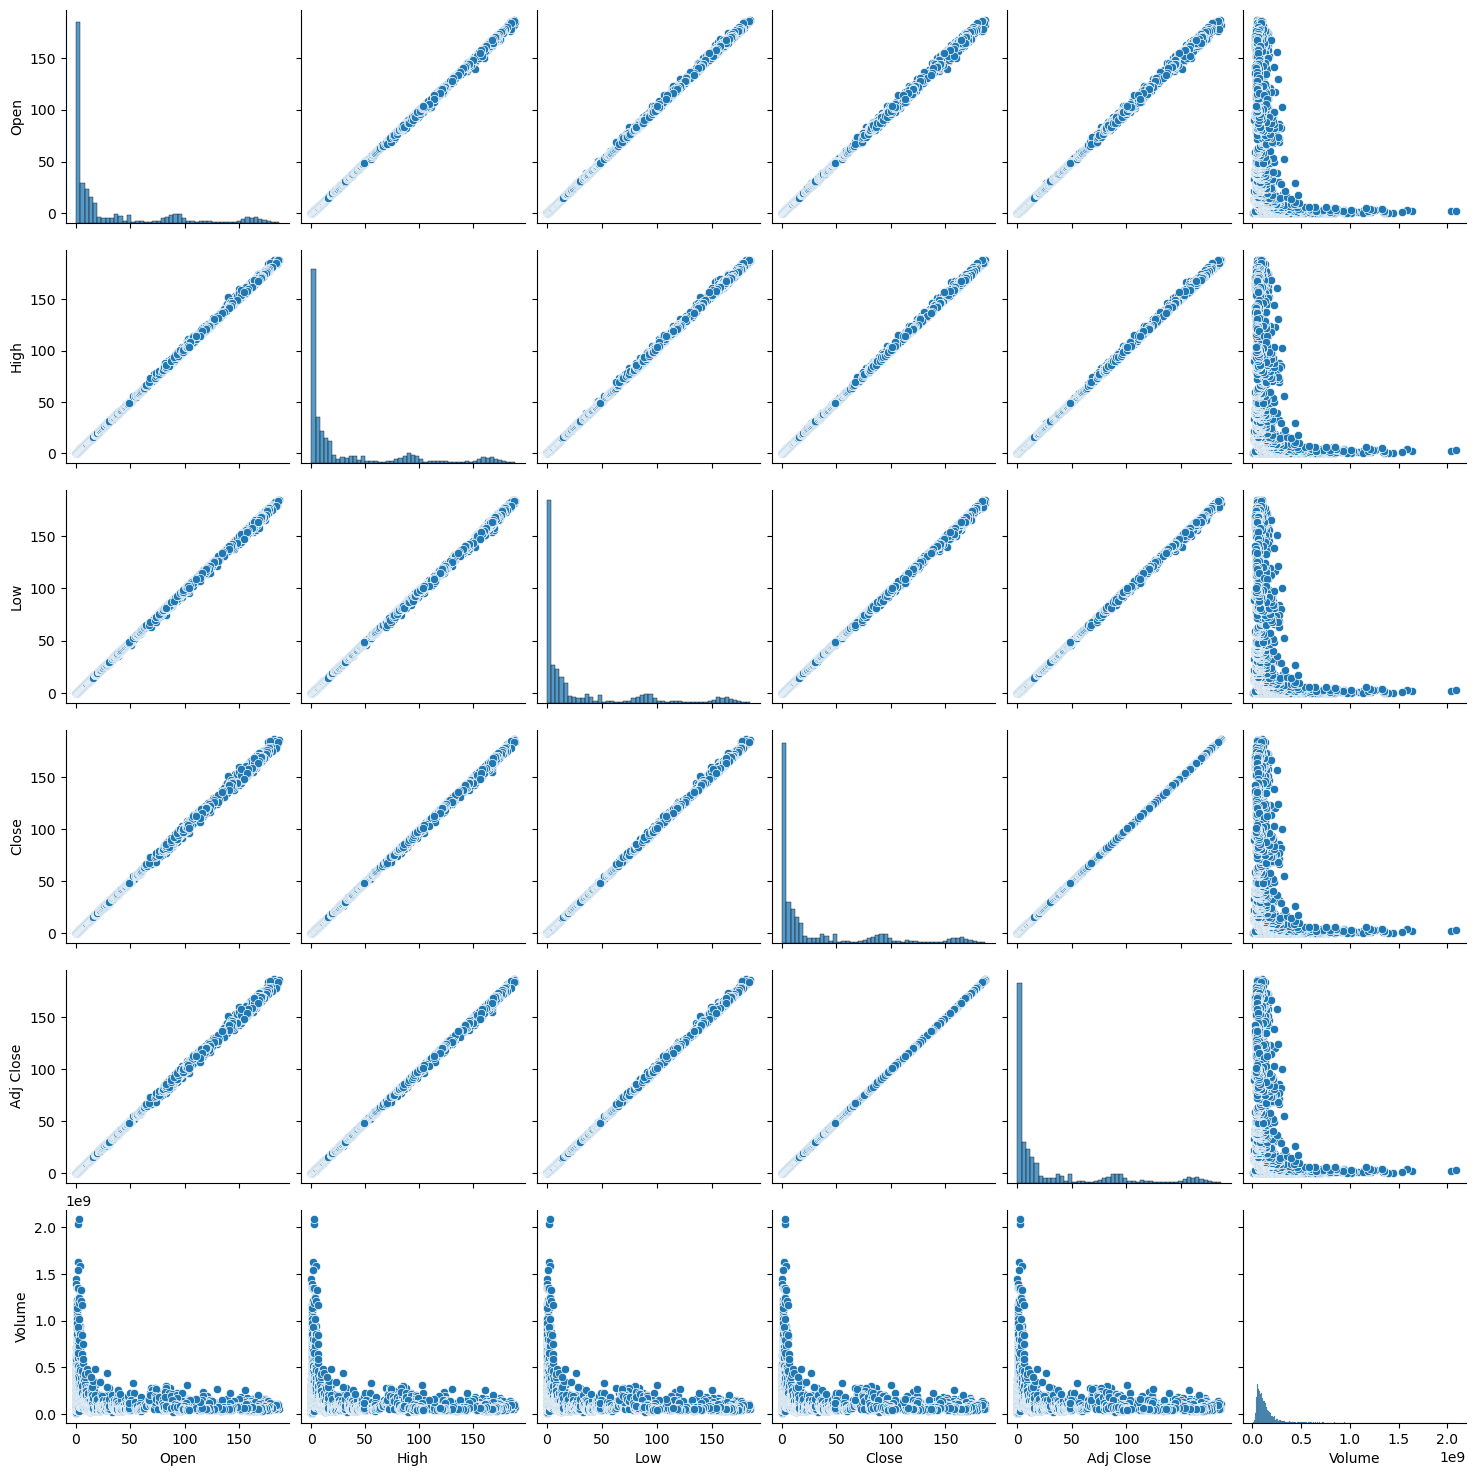

In [6]:
sns.pairplot(df)

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6516 non-null   object 
 1   Open       6516 non-null   float64
 2   High       6516 non-null   float64
 3   Low        6516 non-null   float64
 4   Close      6516 non-null   float64
 5   Adj Close  6516 non-null   float64
 6   Volume     6516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 356.5+ KB


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [10]:

df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

df.dropna(inplace=True)

df.head()


,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_50
Date,,,,,,,,
1997-07-25,0.110938,0.112500,0.110938,0.111458,0.111458,12408000,0.111901,0.088641
1997-07-28,0.111458,0.119792,0.110938,0.116146,0.116146,51480000,0.112839,0.089005
1997-07-29,0.118229,0.125000,0.116667,0.123958,0.123958,96288000,0.113047,0.089755
1997-07-30,0.125000,0.125260,0.121354,0.122396,0.122396,50352000,0.113620,0.090495
1997-07-31,0.121875,0.121875,0.116667,0.119792,0.119792,29088000,0.114505,0.091255


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_50']]
y = df['Close']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5173, 6), (1294, 6), (5173,), (1294,))

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([ 2.36151688,  9.178295  , 39.74912008, ..., 16.30769514,
        1.74881375,  0.755395  ])

In [19]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [33]:
mse=mean_squared_error(y_pred,y_test)
r2_rf=r2_score(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse = np.sqrt(mse)

In [34]:
mse

0.31769727770147144

In [35]:
r2_rf

0.9998485150949613

In [36]:
mae

0.2398815259196308

In [37]:
rmse

0.5636464119476602

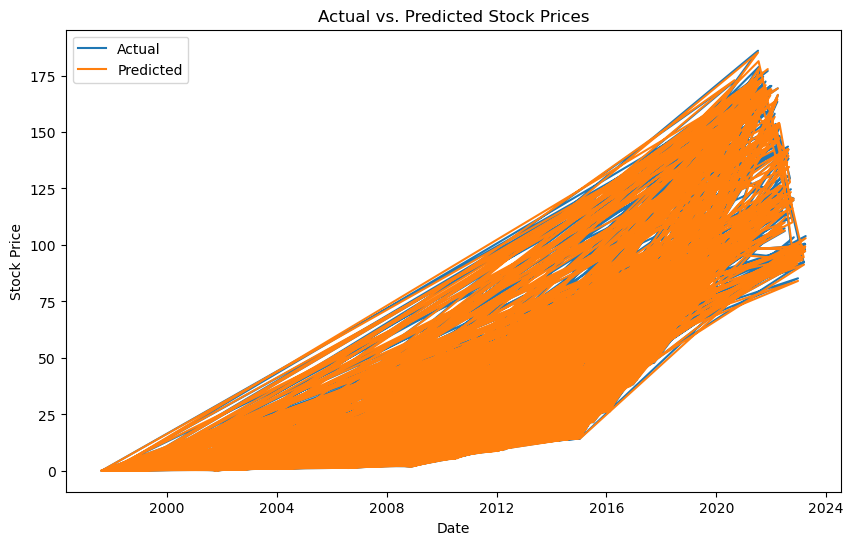

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()


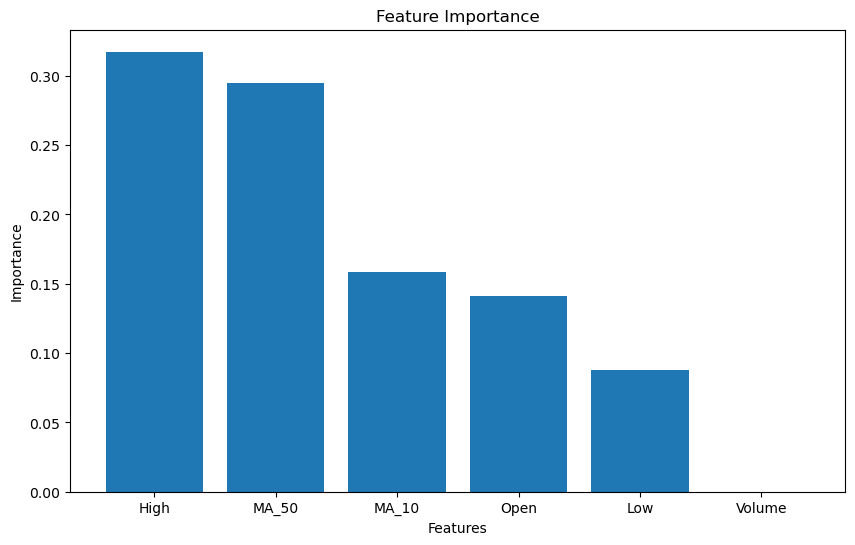

In [25]:
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [26]:
importance_df

,Feature,Importance
1,High,0.317398
5,MA_50,0.295179
4,MA_10,0.158575
0,Open,0.141321
2,Low,0.087511
3,Volume,0.000015


# Insights:

The High price of the day is the most important feature.

The 50-day moving average (MA_50) is also highly influential.

The 10-day moving average (MA_10) and the Open price are moderately important.

The Low price has some impact, but not as much as the top features.

The Volume of trades has negligible importance in this model.

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

mse_gbr, rmse_gbr, r2_gbr


(0.39376984545696364, 0.6275108329399292, 0.9998120963635349)

In [28]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

mse_svr, rmse_svr, r2_svr


(2091.9918351360716, 45.73829724788705, 0.0017192077741728928)

In [38]:
results = {
    'Model': ['Random Forest', 'Gradient Boosting', 'SVR'],
    'MSE': [mse, mse_gbr, mse_svr],
    'RMSE': [rmse, rmse_gbr, rmse_svr],
    'R²': [r2_score(y_test, y_pred), r2_gbr, r2_svr]
}

results_df = pd.DataFrame(results)
results_df


,Model,MSE,RMSE,R²
0,Random Forest,0.317697,0.563646,0.999848
1,Gradient Boosting,0.393770,0.627511,0.999812
2,SVR,2091.991835,45.738297,0.001719


# Insights:

### 1.Random Forest:

MSE: 0.317697

RMSE: 0.563646

R²: 0.999848

The Random Forest model performed the best among the tested models with the lowest MSE and RMSE, and an R² score very close to 1, indicating that it explains nearly all the variability in the target variable.

### 2.Gradient Boosting:

MSE: 0.393770

RMSE: 0.627511

R²: 0.999812

The Gradient Boosting model also performed well, with slightly higher MSE and RMSE compared to the Random Forest model, and a high R² score.

### 3.Support Vector Regressor (SVR):

MSE: 2091.991835

RMSE: 45.738297

R²: 0.001719

The SVR model performed poorly compared to the other models, with significantly higher MSE and RMSE, and a very low R² score, indicating that it does not explain the variability in the target variable well.
